# Import + Chargement des données

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from src.preprocessing import display_missing_values
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set_theme(style="ticks", palette="pastel")

In [2]:
df= pd.read_csv( "data/train.csv", sep=",",low_memory=False)

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

# General Analysis
## Observations + columns

In [104]:
print(f"on compte {df.shape[0]} observations et {df.shape[1]} colonnes\n")
print(f"les colonnes sont:\n\n {df.columns}")

on compte 7571649 observations et 37 colonnes

les colonnes sont:

 Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')


In [4]:
target ='Ewltp (g/km)'

In [7]:
df.head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,Date of registration,Fuel consumption,Electric range (km)
0,0,DE,IP-C519_2022_00008-WF0-1,FORD,FORD WERKE GMBH,FORD WERKE GMBH,NaN,e13*2007/46*1911*15,DEH,R0DB1NX,5BSCENA5JBS,FORD,FOCUS,M1,M1,1,1387.0,1534.0,NaN,401.053306,2700.0,1571.0,1576.0,PETROL,H,999.0,92.0,NaN,e13 32 37,NaN,2.30,NaN,NaN,P,2022-08-29,5.6,NaN
1,1,FR,IP-MQB27ZZ_A2_0529-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*1783*29,AW,ABDLAC,FM5FM5DF008N3VR24BI1CA0I,VOLKSWAGEN,POLO,M1,M1,1,1172.0,1337.0,NaN,394.684459,2552.0,1500.0,1483.0,PETROL,M,999.0,70.0,NaN,e1 29,NaN,1.14,NaN,NaN,P,2022-02-22,5.5,NaN
2,2,FR,IP-MQB27ZZ_A1_0533-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*1783*29,AW,ABDLAC,FD7FD7CW005N2VR24BI1AA0I,VOLKSWAGEN,POLO,M1,M1,1,1204.0,1335.0,NaN,398.561951,2552.0,1500.0,1483.0,PETROL,M,999.0,70.0,NaN,e1 29,NaN,1.14,NaN,NaN,P,2022-03-26,5.6,NaN
3,3,DE,IP-04-U5Y-2018-1137,KIA,KIA SLOVAKIA,KIA SLOVAKIA SRO,NaN,e4*2007/46*1299*18,CD,BAP71,D73F12,KIA,PROCEED,M1,M1,1,1438.0,1588.0,NaN,479.470056,2650.0,1555.0,1563.0,PETROL,M,1591.0,150.0,NaN,e4 28,NaN,0.80,NaN,NaN,P,2022-09-01,6.8,NaN
4,4,FR,IP-MQB27ZZ_B2_0534-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*1783*29,AW,ABDLAA,FD7FD7CW005N2VR24BI1CB0I,VOLKSWAGEN,POLO,M1,M1,1,1207.0,1350.0,NaN,421.854820,2552.0,1500.0,1483.0,PETROL,M,999.0,81.0,NaN,e1 29,NaN,1.14,NaN,NaN,P,2022-01-21,5.9,NaN


In [5]:
col_categoricals = df.select_dtypes(include="object").columns.tolist()

# Puis les numériques
col_numericals = [col for col in df.columns if col not in col_categoricals]


print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

Liste des colonnes catégorielles :
['Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'Ft', 'Fm', 'IT', 'Status', 'Date of registration']

Liste des colonnes numériques :
['ID', 'MMS', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Fuel consumption ', 'Electric range (km)']


## NaN and Unique values

In [5]:
display_missing_values(df)

,Colonne,pourcentage manquant,nombre
0,MMS,100.000000,7571649
1,Ernedc (g/km),100.000000,7571649
2,De,100.000000,7571649
3,Vf,100.000000,7571649
4,Enedc (g/km),83.839201,6348010
5,Electric range (km),82.957451,6281247
6,z (Wh/km),77.979434,5904329
7,Erwltp (g/km),46.477920,3519145
8,IT,37.783975,2860870
9,Fuel consumption,23.506914,1779861


In [13]:
valeurs_uniques = {}
nombre_val_unique={}
for col in df.columns:
    valeurs_uniques[col]=df[col].unique().tolist()
    nombre_val_unique[col]=df[col].nunique()

In [18]:
for element in nombre_val_unique:
    if nombre_val_unique[element]==1:
        print(element, nombre_val_unique[element])

r 1
Status 1


In [21]:
print(valeurs_uniques['Cn'])

['FOCUS', 'POLO', 'PROCEED', 'FABIA', 'CLA 250 E', 'OCTAVIA', 'QASHQAI', 'MACAN', 'COMPASS', 'PROACE', 'KAROQ', 'DUCATO', 'ES300H', 'SUPERB', 'AMG CLA 45 S', 'A3 SPORTBACK', 'ASTRA SPORTS TOURER+', 'OCTAVIA RS', 'PROACE CITY VERSO', 'A3 LIMOUSINE', 'OCTAVIA SCOUT', 'CROSSLAND', 'S3 SPORTBACK', 'RX450H', 'LAND CRUISER (150 SERIES)', 'SCALA', 'KAMIQ', 'JUKE', 'GRANDLAND X', 'KODIAQ', 'VIVARO / ZAFIRA LIFE', 'MOKKA', 'RX450HL', '500L', 'JAZZ', 'YARIS CROSS', '500', 'INSIGNIA GRAND SPORT', 'INSIGNIA SPORTS TOURER', '718 BOXSTER SPYDER', 'STELVIO', 'CEED', 'XCEED', 'RENEGADE', 'CAYENNE TURBO GT', 'AMG CLA 45', 'YARIS', 'CAYENNE', 'PANDA', 'CX-30', 'FORESTER', 'SPACE STAR', '6', 'COMBO LIFE', 'RAV4', 'MACAN S', 'A1 SPORTBACK', 'A1 ALLSTREET', 'IMPREZA', 'XV', 'A1 CITYCARVER', 'GR YARIS', 'GIULIA', 'AMG A 45', 'C-HR', 'T-CROSS', 'COROLLA', '3', '320d xDrive', 'CAMRY', 'A 250 4MATIC', 'X5 xDrive30d', '500X', 'OUTBACK', 'AMG A 45S', 'AMG A 45S 4MATIC+', '318i', 'TIPO', 'CORSA', 'ASTRA SPORTS TO

# Target Analysis

## Histogram

<Axes: xlabel='Ewltp (g/km)', ylabel='Count'>

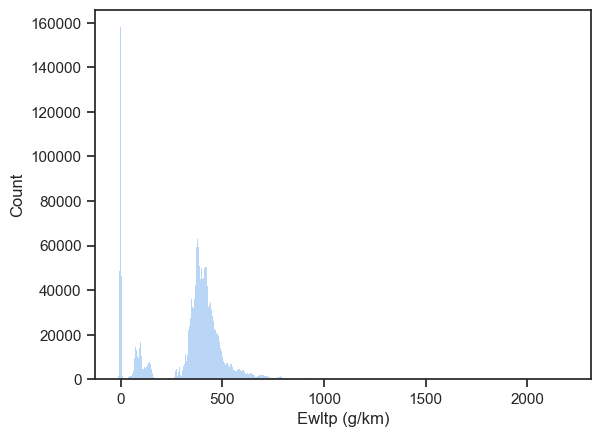

In [10]:
sns.histplot(df,x=target)

## Boxplot


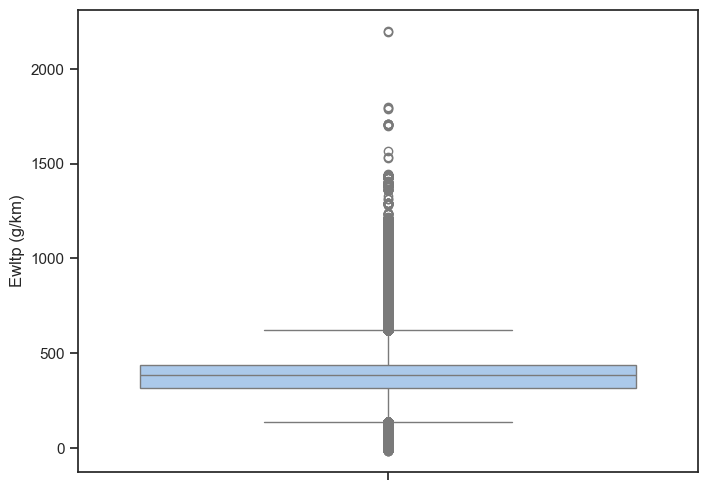

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[target])
plt.show()

## Describe of Target

In [17]:
df[target].describe()

count    7.571649e+06
mean     3.402771e+02
std      1.830414e+02
min     -1.530574e+01
25%      3.176032e+02
50%      3.866023e+02
75%      4.382117e+02
max      2.200959e+03
Name: Ewltp (g/km), dtype: float64

## Outliers Analysis

In [23]:
print(f"On compte près de {df[df[target]<0].shape[0]} individus avec une WLTP inférieur à 0 ce qui est anormal")

On compte près de 510998 individus avec une WLTP inférieur à 0 ce qui est anormal


In [25]:
df_avec_target_negative = df[df[target]<0]

### Doublons purs

In [27]:
print(f" il y a {df_avec_target_negative.duplicated().sum()} doublons purs")


 il y a 0 doublons purs


### Doublons impurs
Regarder la donnée à première vue.

In [44]:
df_avec_target_negative.head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,Date of registration,Fuel consumption,Electric range (km)
17336,17336,DE,IP-2021_4023-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,e1*2018/858*00036*01,E2EQEW,51ECA0,ZZAM050B,MERCEDES-BENZ,EQE 350+,M1,M1,1,2355.0,2536.0,0.0,-2.684841,3120.0,1634.0,1645.0,ELECTRIC,E,NaN,215.0,169.0,NaN,NaN,NaN,NaN,NaN,P,2022-06-03,NaN,NaN
17360,17360,DE,IP-2021_4023-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,e1*2018/858*00036*01,E2EQEW,51ECA0,ZZAM050B,MERCEDES-BENZ,EQE 350+,M1,M1,1,2355.0,2536.0,0.0,-0.362751,3120.0,1634.0,1645.0,ELECTRIC,E,NaN,215.0,169.0,NaN,NaN,NaN,NaN,NaN,P,2022-05-30,NaN,NaN
17388,17388,DE,IP-2021_4023-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,e1*2018/858*00036*01,E2EQEW,51ECA0,ZZAA050B,MERCEDES-BENZ,EQE 350+,M1,M1,1,2355.0,2500.0,0.0,-1.806524,3120.0,1634.0,1645.0,ELECTRIC,E,NaN,215.0,165.0,NaN,NaN,NaN,NaN,NaN,P,2022-05-23,NaN,NaN
17433,17433,DE,IP-2021_4023-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,e1*2018/858*00036*01,E2EQEW,51ECA0,ZZAL050B,MERCEDES-BENZ,EQE 350+,M1,M1,1,2355.0,2519.0,0.0,-0.865340,3120.0,1634.0,1645.0,ELECTRIC,E,NaN,215.0,167.0,NaN,NaN,NaN,NaN,NaN,P,2022-06-28,NaN,NaN
17438,17438,DE,IP-2021_4023-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,e1*2018/858*00036*01,E2EQEW,51ECA0,ZZAL050B,MERCEDES-BENZ,EQE 350+,M1,M1,1,2355.0,2514.0,0.0,-4.091158,3120.0,1634.0,1645.0,ELECTRIC,E,NaN,215.0,170.0,NaN,NaN,NaN,NaN,NaN,P,2022-05-16,NaN,NaN


In [63]:
selected_columns = [col for col in df_avec_target_negative.columns if col not in ['ID','Ewltp (g/km)','Date of registration']]

duplicate_count = df_avec_target_negative.duplicated(subset=selected_columns).sum()

print(f"Il y a {duplicate_count} individus qui présentent exactement les mêmes caractéristiques (hors colonne 'ID', target et Date of Registration).")


Il y a 422232 individus qui présentent exactement les mêmes caractéristiques (hors colonne 'ID', target et Date of Registration).


# Analyse par variable des régresseurs
## Mp - Manufacturer Pooling

D'après GPT

le "Manufacturer Pooling" est une stratégie qui permet aux constructeurs automobiles de travailler ensemble pour respecter les réglementations sur les émissions de CO2 en combinant leurs émissions et en partageant les avantages liés à la conformité.

In [79]:
valeurs_uniques['Mp']

['FORD',
 'VOLKSWAGEN',
 'KIA',
 'MERCEDES-BENZ',
 'RENAULT-NISSAN-MITSUBISHI',
 'STELLANTIS',
 'MAZDA-SUBARU-SUZUKI-TOYOTA',
 'TESLA-HONDA-JLR',
 nan,
 'BMW',
 'HYUNDAI MOTOR EUROPE']

In [88]:
df[df['Mp'].isna()].head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,Date of registration,Fuel consumption,Electric range (km)
894,894,CZ,IP-0153-JT1-1,NaN,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00013*00,XPB1F(M),MXPJ10(H),MXPJ10L-BHXGBW(1A),TOYOTA,YARIS CROSS,M1,M1,1,1290.0,1391.0,NaN,351.479352,2560.0,NaN,NaN,PETROL,H,1490.0,68.0,NaN,e6 37,NaN,0.7,NaN,NaN,P,2022-01-05,5.0,NaN
898,898,CZ,IP-0153-JT1-1,NaN,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00013*00,XPB1F(M),MXPJ10(H),MXPJ10L-BHXGBW(1A),TOYOTA,YARIS CROSS,M1,M1,1,1290.0,1402.0,NaN,350.093265,2560.0,NaN,NaN,PETROL,H,1490.0,68.0,NaN,e6 37,NaN,0.7,NaN,NaN,P,2022-01-26,5.0,NaN
899,899,CZ,IP-0153-JT1-1,NaN,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00013*00,XPB1F(M),MXPJ10(H),MXPJ10L-BHXGBW(1A),TOYOTA,YARIS CROSS,M1,M1,1,1290.0,1391.0,NaN,349.996284,2560.0,NaN,NaN,PETROL,H,1490.0,68.0,NaN,e6 37,NaN,0.7,NaN,NaN,P,2022-02-02,5.0,NaN
900,900,CZ,IP-0153-JT1-1,NaN,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00013*00,XPB1F(M),MXPJ10(H),MXPJ10L-BHXGBW(1A),TOYOTA,YARIS CROSS,M1,M1,1,1290.0,1402.0,NaN,353.377454,2560.0,NaN,NaN,PETROL,H,1490.0,68.0,NaN,e6 37,NaN,0.7,NaN,NaN,P,2022-01-31,5.0,NaN
902,902,CZ,IP-0153-JT1-1,NaN,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00013*00,XPB1F(M),MXPJ10(H),MXPJ10L-BHXGBW(1A),TOYOTA,YARIS CROSS,M1,M1,1,1290.0,1391.0,NaN,344.731927,2560.0,NaN,NaN,PETROL,H,1490.0,68.0,NaN,e6 37,NaN,0.7,NaN,NaN,P,2022-03-23,5.0,NaN


**Comment s'occupe-t-on des valeurs manquantes ?**

On voit que les NaN sont récupérables pour certains avec la colonne `Mh` ou encore `Man`. En fait je sais pas trop, parce qu'il est aussi possible que ça soit déclaré NaN parce que justement il n'apparait pas dedans...

Ex de récupération possible: pour ID 894 on peut voir que Mh= Toyota donc sûrement que Mp = 'MAZDA-SUBARU-SUZUKI-TOYOTA'

In [89]:
print(f"On compte {df['Mp'].isna().sum()} valeurs manquantes pour 'Mp' ")

On compte 485564 valeurs manquantes pour 'Mp' 


## VFN - Vehicle family identification number

D'après ce que j'ai compris c'est un espèce de code d'indentification et de suivi en interne pour les voitures. On peut y trouver comme info: fabricant, le modèle, l'année de fabrication, le pays d'origine, le type de moteur, etc.

Le problème c'est qe je ne vois aps comment on décode ça, puisque généralement c'est interne ou alors propre à chaque marque ? Faudrait creuser mais il est possible que ça puisse nous aider à remplir les NaN qu'on possède

**mon avis**: aucune idée de quoi faire de cette variable, pour l'instant j'en vois pas l'utilité surtout qu'il faut savoir décoder à quoi correspond les codes mdr

In [94]:
nombre_val_unique['VFN']

8456

In [95]:
valeurs_uniques['VFN'][:10]

['IP-C519_2022_00008-WF0-1',
 'IP-MQB27ZZ_A2_0529-WVW-1',
 'IP-MQB27ZZ_A1_0533-WVW-1',
 'IP-04-U5Y-2018-1137',
 'IP-MQB27ZZ_B2_0534-WVW-1',
 'IP-MQB27ZZ_A0_1019-TMB-1',
 'IP-2021_0416-W1K-1',
 'IP-2021_0421-W1K-1',
 'IP-2021_0422-W1K-1',
 'IP-MQB27ZZ_A0_1005-TMB-1']

In [96]:
df[df['VFN'].isna()].shape

(652232, 37)

## Mh -Manufacturer name EU standard denomination
D'après GPT

L'utilisation de cette désignation normalisée aide à garantir la clarté et la cohérence dans la documentation et les réglementations relatives aux véhicules automobiles au sein de l'UE, où de nombreuses marques et fabricants opèrent sur un marché unique.

Chaque fabricant a son propre code "Mh" attribué, de sorte que ces codes sont spécifiques à chaque entreprise et permettent une identification précise des fabricants de véhicules.

**Mon avis**: On garde, 0 NaN, et peut nous aider dans les var catégorielles. A voir ce qu'on en fait plus tard.

In [98]:
nombre_val_unique['Mh']

95

In [99]:
valeurs_uniques['Mh'][:10]

['FORD WERKE GMBH',
 'VOLKSWAGEN',
 'KIA SLOVAKIA',
 'SKODA',
 'MERCEDES-BENZ AG',
 'NISSAN AUTOMOTIVE EUROPE',
 'PORSCHE',
 'FIAT GROUP',
 'TOYOTA',
 'AUDI AG']

In [100]:
df[df['Mh'].isna()].shape

(0, 37)

## Man - Manufacturer name OEM declaration

Pareil 0 Nan on peut garder à mon avis, à voir ce qu'on en fait évidemment.

In [110]:
print(f"On compte {nombre_val_unique['Man']} valeurs uniques et {df[df['Man'].isna()].shape[0]} NaN, quelques exemples de valeurs de Man:\n\n{valeurs_uniques['Man'][:5]}")

On compte 104 valeurs uniques et 0 NaN, quelques exemples de valeurs de Man:

['FORD WERKE GMBH', 'VOLKSWAGEN AG', 'KIA SLOVAKIA SRO', 'SKODA AUTO AS', 'MERCEDES-BENZ AG']


## TAN - Type approval number
D'après GPT

Le "Type Approval Number" est un numéro attribué à un produit, généralement dans le domaine de l'automobile, pour indiquer qu'il est conforme aux réglementations et normes spécifiques. Cela garantit sa qualité et sa sécurité pour une utilisation conforme aux normes établies.

l'absence d'un TAN (Type Approval Number) sur un véhicule peut indiquer qu'il n'est pas homologué ou qu'il ne répond pas aux normes réglementaires requises pour être utilisé sur la route. Le TAN est un identifiant qui atteste que le véhicule a été soumis aux tests, vérifications et certifications nécessaires pour garantir sa conformité aux normes de sécurité et d'émissions.

Cependant, il est essentiel de noter que la réglementation peut varier d'un pays à l'autre, et dans certains cas, il peut y avoir des exemptions ou des situations particulières où un véhicule spécifique n'a pas besoin d'un TAN pour être utilisé légalement

**mon avis**: peut-être que les TAN manquant (valeur = NaN) signifient que les véhicules ne sont pas homologués (ils n'ont pas passé les test de conformité). On pourrait peut être aussi créer une colonne "conforme aux normes" avec 0 si non conforme et 1 si conforme (c'est juste une idée)

In [112]:
print(f"On compte {nombre_val_unique['Tan']} valeurs uniques et {df[df['Tan'].isna()].shape[0]} NaN, quelques exemples de valeurs de Tan:\n\n{valeurs_uniques['Tan'][:5]}")

On compte 6318 valeurs uniques et 12401 NaN, quelques exemples de valeurs de Tan:

['e13*2007/46*1911*15', 'e1*2007/46*1783*29', 'e4*2007/46*1299*18', 'e8*2018/858*00014*01', 'e1*2007/46*1912*18']


## T - Type
GPT

Le Type T (ou "Type de modèle") est une classification qui permet d'identifier différents modèles de voitures au sein d'une même marque ou d'un même constructeur. Ces codes permettent aux constructeurs automobiles et aux autorités de suivre et d'identifier clairement chaque modèle de voiture.

Pour connaître la signification d'un code de Type T spécifique, vous devrez généralement consulter les documents officiels du constructeur, tels que les manuels du propriétaire, les sites Web du constructeur, les informations sur les véhicules spécifiques ou contacter directement le service client du constructeur

In [114]:
print(f"On compte {nombre_val_unique['T']} valeurs uniques et {df[df['T'].isna()].shape[0]} NaN, quelques exemples de valeurs de T:\n\n{valeurs_uniques['T'][:5]}")

On compte 1506 valeurs uniques et 1399 NaN, quelques exemples de valeurs de T:

['DEH', 'AW', 'CD', 'PJ', 'F2CLA']


## Va - Variant

Le code "Va - Variant" pour une voiture se réfère généralement à une variante ou une version spécifique d'un modèle de véhicule. Par exemple, un modèle de base peut avoir plusieurs variantes telles qu'une version de base, une version haut de gamme avec des équipements supplémentaires, une version sportive avec un moteur plus puissant, etc. 

In [115]:
print(f"On compte {nombre_val_unique['Va']} valeurs uniques et {df[df['Va'].isna()].shape[0]} NaN, quelques exemples de valeurs de Va:\n\n{valeurs_uniques['Va'][:5]}")

On compte 5413 valeurs uniques et 11740 NaN, quelques exemples de valeurs de Va:

['R0DB1NX', 'ABDLAC', 'BAP71', 'ABDLAA', 'ABDLACX0']


## Ve - Version

Le code "Ve - Version" pour une voiture se réfère généralement à la version spécifique ou à la configuration particulière d'un modèle de véhicule. Les codes de version permettent de catégoriser et d'identifier les différentes versions d'un modèle dans les systèmes de gestion des véhicules. Par exemple, un constructeur automobile peut utiliser un code "Ve" pour indiquer une version de base, tandis qu'un autre code "Ve" peut être associé à une version haut de gamme avec des caractéristiques supplémentaires.

In [116]:
print(f"On compte {nombre_val_unique['Ve']} valeurs uniques et {df[df['Ve'].isna()].shape[0]} NaN, quelques exemples de valeurs de Ve:\n\n{valeurs_uniques['Ve'][:5]}")

On compte 25570 valeurs uniques et 32077 NaN, quelques exemples de valeurs de Ve:

['5BSCENA5JBS', 'FM5FM5DF008N3VR24BI1CA0I', 'FD7FD7CW005N2VR24BI1AA0I', 'D73F12', 'FD7FD7CW005N2VR24BI1CB0I']


## Mk - Make

Make fait référence au fabricant ou au constructeur de la voiture. C'est essentiellement le nom de la marque qui produit le véhicule.

A voir ce qu'on en fait c'est une variable catégorielle

In [117]:
print(f"On compte {nombre_val_unique['Mk']} valeurs uniques et {df[df['Mk'].isna()].shape[0]} NaN, quelques exemples de valeurs de Mk:\n\n{valeurs_uniques['Mk'][:5]}")

On compte 694 valeurs uniques et 212 NaN, quelques exemples de valeurs de Mk:

['FORD', 'VOLKSWAGEN', 'KIA', 'SKODA', 'MERCEDES-BENZ']


## Cn - Commercial name

In [118]:
print(f"On compte {nombre_val_unique['Cn']} valeurs uniques et {df[df['Cn'].isna()].shape[0]} NaN, quelques exemples de valeurs de Cn:\n\n{valeurs_uniques['Cn'][:5]}")

On compte 8323 valeurs uniques et 115232 NaN, quelques exemples de valeurs de Cn:

['FOCUS', 'POLO', 'PROCEED', 'FABIA', 'CLA 250 E']


## Ct - Category of the vehicle type approved

Ct fait référence à la catégorie dans laquelle un type de véhicule particulier a été homologué ou certifié pour être conforme aux normes réglementaires spécifiques. Par exemple, un code "Ct" indiquant "Passenger Car" (voiture particulière) signifie que le véhicule est homologué en tant que voiture particulière, tandis qu'un code "Ct" indiquant "Light Commercial Vehicle" (véhicule utilitaire léger) indiquerait que le véhicule est homologué en tant que tel. Cela peut influencer diverses réglementations et taxes qui s'appliquent aux véhicules en fonction de leur catégorie.

**mon avis**: On pourrait en faire une variable encodée facilement

selon les réglementations de l'Union européenne. Voici quelques exemples de ces codes :

- M1 : Voiture particulière.
- M1G : Voiture particulière écologique.
- M2 : Véhicule de transport de personnes avec plus de 8 places assises.
- M2G : Véhicule de transport de personnes avec plus de 8 places assises, écologique.
- M3 : Véhicule de transport de personnes avec plus de 8 places assises.
- N1 : Véhicule utilitaire léger (camionnette).
- N1G : Véhicule utilitaire léger (camionnette) écologique.
- N2 : Véhicule utilitaire.
- N2G : Véhicule utilitaire écologique.
- N3 : Véhicule utilitaire.
- L : Deux-roues à moteur.
- L3e : Deux-roues à moteur, catégorie 3 roues.
- L4e : Deux-roues à moteur, catégorie 4 roues.
- L5e : Deux-roues à moteur, catégorie 5 roues.
- L7e : Deux-roues à moteur, catégorie 7 roues.
- L9e : Deux-roues à moteur, catégorie 9 roues.
- L2e : Deux-roues à moteur électriques.

In [119]:
print(f"On compte {nombre_val_unique['Ct']} valeurs uniques et {df[df['Ct'].isna()].shape[0]} NaN, quelques exemples de valeurs de Ct:\n\n{valeurs_uniques['Ct'][:5]}")

On compte 5 valeurs uniques et 11829 NaN, quelques exemples de valeurs de Ct:

['M1', 'M1G', 'N1', nan, 'N2']


In [121]:
df[df['Ct'].isna()].head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,Date of registration,Fuel consumption,Electric range (km)
754419,754419,IT,NaN,NaN,DR AUTOMOBILES,DR AUTOMOBILES SRL,NaN,e3*KS07/46*0296*16,D3,J,2,DR,EVO4,NaN,M1,1,1320.0,NaN,NaN,394.336373,2560.0,1480.0,NaN,LPG,B,1590.0,84.0,NaN,E1 29,NaN,NaN,NaN,NaN,P,2022-02-08,NaN,NaN
754423,754423,IT,NaN,VOLKSWAGEN,LAMBORGHINI,AUTOMOBILI LAMBORGHINI SPA,NaN,e3*KS07/46*0075*19,834,U,21ALC,LAMBORGHINI,AVENTADOR,NaN,M1,1,1790.0,NaN,NaN,1388.506093,2700.0,1720.0,NaN,PETROL,M,6498.0,574.0,NaN,E1 29,NaN,NaN,NaN,NaN,P,2022-05-20,NaN,NaN
754425,754425,IT,NaN,VOLKSWAGEN,LAMBORGHINI,AUTOMOBILI LAMBORGHINI SPA,NaN,e3*KS07/46*0075*19,834,U,21ALC,LAMBORGHINI,AVENTADOR,NaN,M1,1,1790.0,NaN,NaN,1387.013383,2700.0,1720.0,NaN,PETROL,M,6498.0,574.0,NaN,E1 29,NaN,NaN,NaN,NaN,P,2022-06-22,NaN,NaN
754430,754430,IT,NaN,NaN,AA-IVA,AA-IVA,NaN,e3*2007/46*0064*64,312,AYD1B,E25ACM,FIAT,FIAT 500,NaN,M1,1,1074.0,NaN,NaN,330.410980,2300.0,NaN,NaN,PETROL,H,999.0,52.0,NaN,E1 29,NaN,NaN,NaN,NaN,P,2022-09-22,NaN,NaN
754436,754436,IT,NaN,NaN,DR AUTOMOBILES,DR AUTOMOBILES SRL,NaN,e3*KS07/46*0296*16,D3,J,2,DR,EVO4,NaN,M1,1,1320.0,NaN,NaN,400.099175,2560.0,1480.0,NaN,LPG,B,1590.0,84.0,NaN,E1 29,NaN,NaN,NaN,NaN,P,2022-05-27,NaN,NaN
